# Setup python session and notebook

We start with importing what we will need. Note here that we want to have matplotlib to do the plot in our notebook! That means we are free to zoom and navigate in the plot even after plotting. Check out different possiblities on your own, please.

In [84]:
import numpy as np
import pencil as pc
import matplotlib.pyplot as plt

# Get simulation as object

We will use the sample in 'pencil-code/python/tutorials/sample_simulations/2d_streaming_instability' in this notebook. So lets start by reading that simulation in as a simulation object.

In [85]:
SIMns = pc.get_sim('no_source')
SIMrd = pc.get_sim('ramp_decay')
SIMsd = pc.get_sim('step_decay')
SIMnd = pc.get_sim('step_no_decay')

# Read timeseries
Thats already it! Lets get the timeseries and plot it!

Note: If you want to suppress output from a python command, append ; to that line.

In [86]:
tsns = pc.read.ts(file_name="time_series.dat",datadir=SIMns.datadir)
tsrd = pc.read.ts(file_name="time_series.dat",datadir=SIMrd.datadir)
tssd = pc.read.ts(file_name="time_series.dat",datadir=SIMsd.datadir)
tsnd = pc.read.ts(file_name="time_series.dat",datadir=SIMnd.datadir)

tsall = [tsns, tsrd, tssd, tsnd]
labels = ['no_source', 'ramp_decay', 'step_decay', 'step_no_decay']

Read 40 lines.
Read 32 lines.
Read 20 lines.
Read 20 lines.


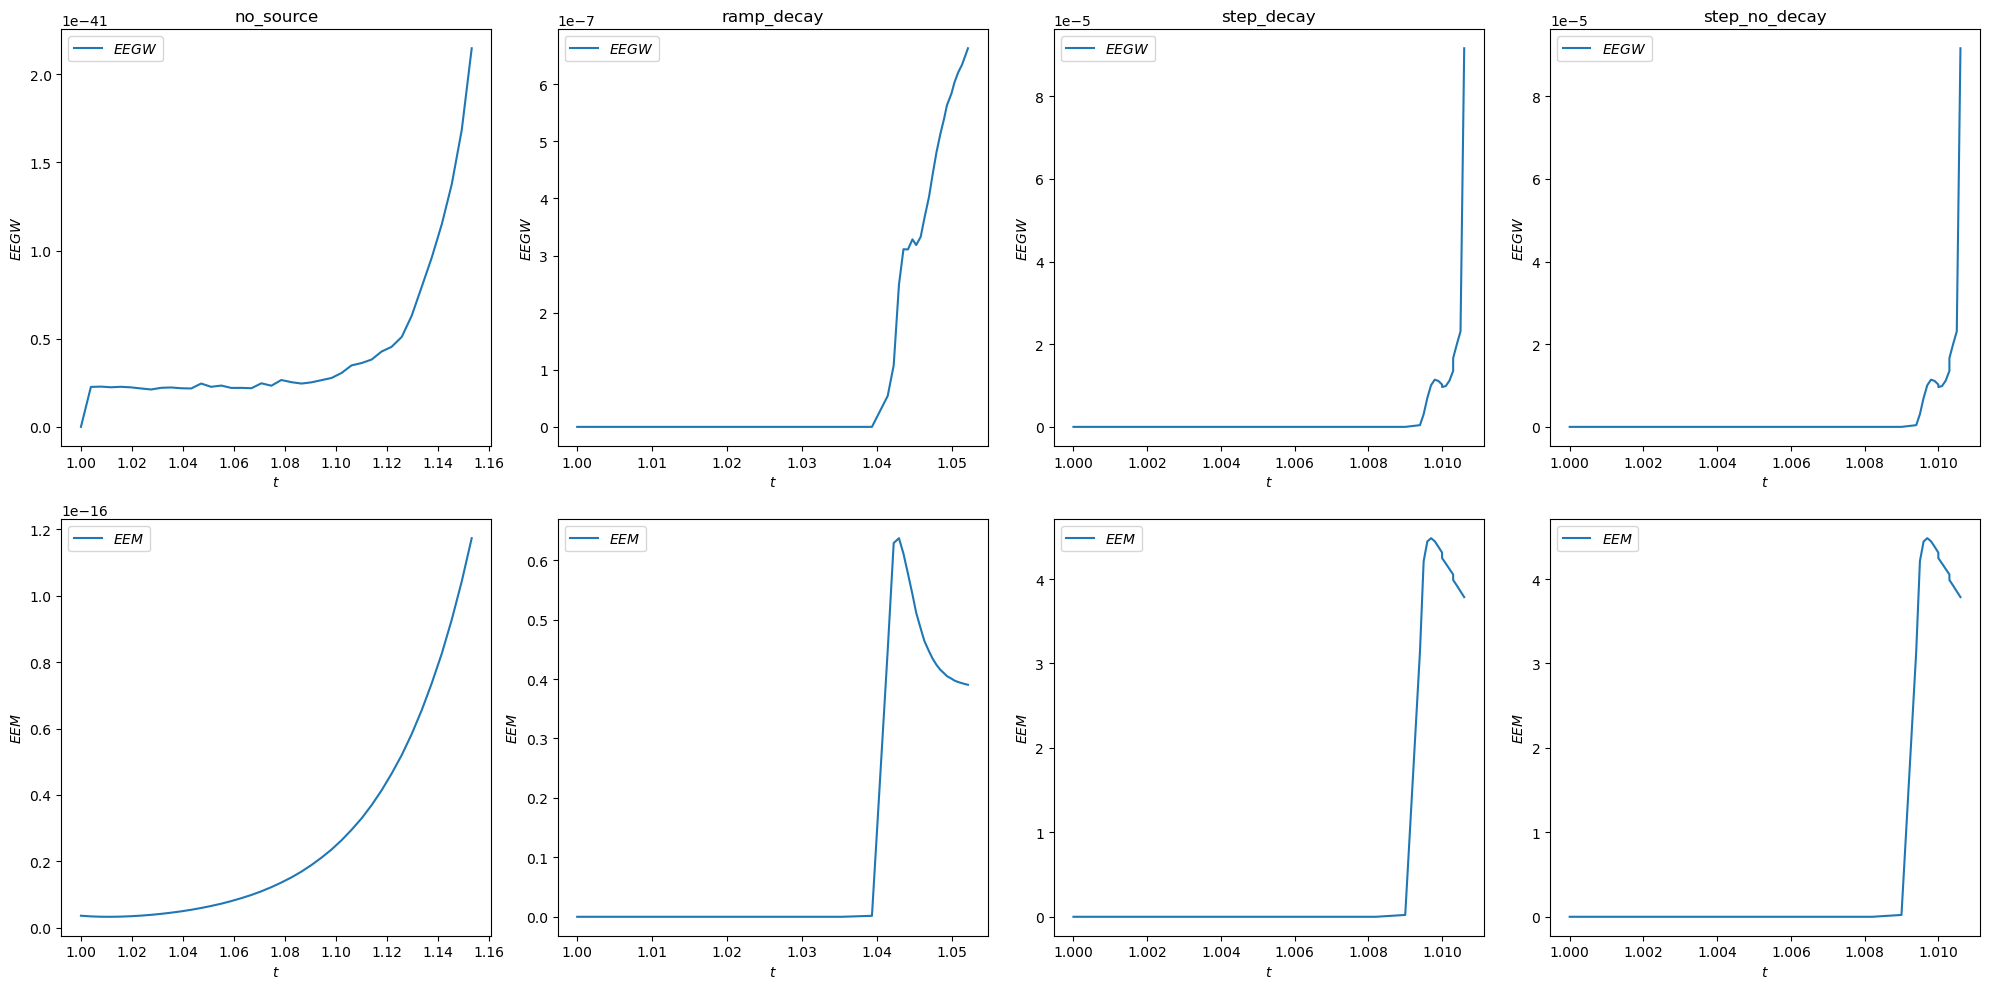

In [87]:
fig, ax = plt.subplots(2, len(tsall), figsize=(20,10))
for id,sim in enumerate(tsall):
    ax[0,id].plot(sim.t, sim.EEGW, label=r'$EEGW$')
    ax[1,id].plot(sim.t, sim.EEM, label=r'$EEM$')
    ax[0,id].set_title(labels[id])
    ax[0,id].set_xlabel(r'$t$')
    ax[0,id].set_ylabel(r'$EEGW$')
    ax[1,id].set_xlabel(r'$t$')
    ax[1,id].set_ylabel(r'$EEM$')
    ax[0,id].legend()
    ax[1,id].legend()
plt.tight_layout()
plt.show()

### Plotinf everything togather


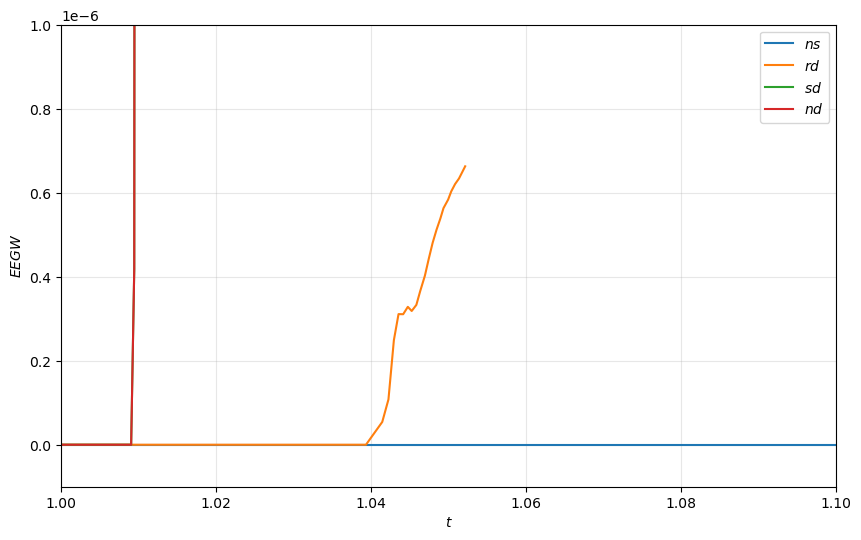

In [88]:
# Create the figure
plt.figure(figsize=(10, 6))

# Plot each dataset with its own x and y values
plt.plot(tsns.t, tsns.EEGW, label=r'$ns$')
plt.plot(tsrd.t, tsrd.EEGW, label=r'$rd$')
plt.plot(tssd.t, tssd.EEGW, label=r'$sd$')
plt.plot(tsnd.t, tsnd.EEGW, label=r'$nd$')

# Add labels and legend
plt.xlabel(r'$t$')
plt.ylabel(r'$EEGW$')
plt.legend()

# limits
plt.xlim(1, 1.10)
plt.ylim(-1e-7, 1e-6)
# Optional: Add grid for better readability
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

## Reading parameters from the corespontid simulations

Here I will show all the paeremaeteres used in the conresponding simultatuon

In [89]:
params_ns = pc.read.param(datadir=SIMns.datadir,param2=True)
params_rd = pc.read.param(datadir=SIMrd.datadir,param2=True)
params_sd = pc.read.param(datadir=SIMsd.datadir,param2=True)
params_nd = pc.read.param(datadir=SIMnd.datadir,param2=True)
paramskeys_ns = list(params_ns.keys)
paramskeys_rd = list(params_rd.keys)
paramskeys_sd = list(params_sd.keys)
paramskeys_nd = list(params_nd.keys)

params_all = [params_ns, params_rd, params_sd, params_nd]
params_labels = ['no_source', 'ramp_decay', 'step_decay', 'step_no_decay']

In [90]:
#Sources parameters for all simulations
for id,sim in enumerate(params_all):
    print("____________________")
    print(f"key: {params_labels[id]}")
    print(f"source5: {params_all[id].source5:e}")
    print(f"source5_tdep: {params_all[id].source5_tdep}")
    print(f"source5_expt: {params_all[id].source5_expt}")


____________________
key: no_source
source5: 0.000000e+00
source5_tdep: const
source5_expt: 0.0
____________________
key: ramp_decay
source5: 1.000000e+09
source5_tdep: step_decay_linear_ramp
source5_expt: 0.5
____________________
key: step_decay
source5: 1.000000e+09
source5_tdep: step
source5_expt: 0.0
____________________
key: step_no_decay
source5: 1.000000e+09
source5_tdep: step
source5_expt: 0.0


## Generating power spectrum

### general practice

In [91]:
# read powr spec
pwns = pc.read.power(datadir=SIMns.datadir)
print(pwns.krms)

power_GWh.dat
powerhel_GWs.dat
power_Tpq.dat
power_Str.dat
powerhel_kin.dat
power_GWs.dat
powerhel_mag.dat
power_sp.dat
power_krms.dat
power_SCL.dat
power_mag.dat
powerhel_Str.dat
power_VCT.dat
power_kin.dat
powerhel_GWh.dat
[ 0.    1.29  2.24  3.14  4.07  5.11  6.13  7.08  8.03  9.06 10.1  11.1
 12.   13.   14.1  15.   16.   17.   18.1  19.   20.   21.   22.   23.
 24.   25.   26.   27.   28.   29.   30.   31.  ]


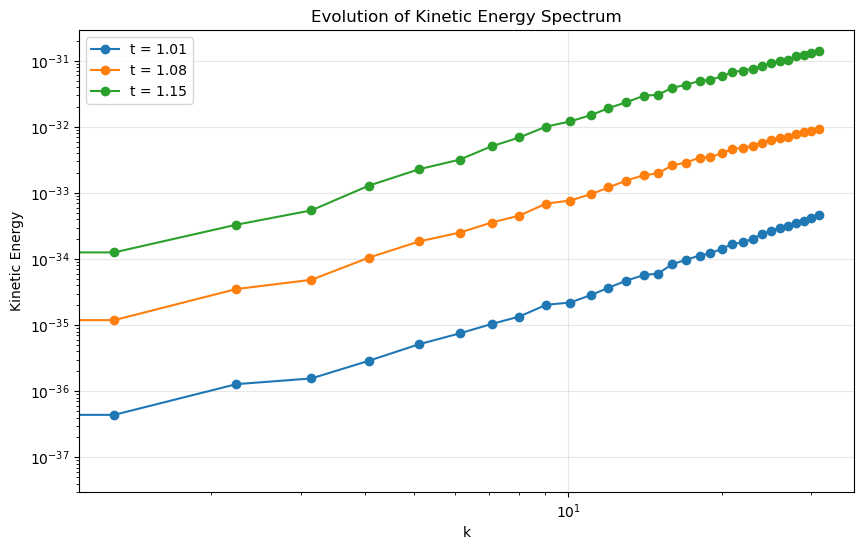

In [92]:
# Compare kinetic energy spectrum at different times
plt.figure(figsize=(10, 6))

# Early, middle, and late snapshots
times = [0, len(pwns.t)//2, -1]
for idx in times:
    plt.loglog(pwns.krms, pwns.kin[idx], 'o-', label=f't = {pwns.t[idx]:.2f}')

plt.xlabel('k')
plt.ylabel('Kinetic Energy')
plt.title('Evolution of Kinetic Energy Spectrum')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

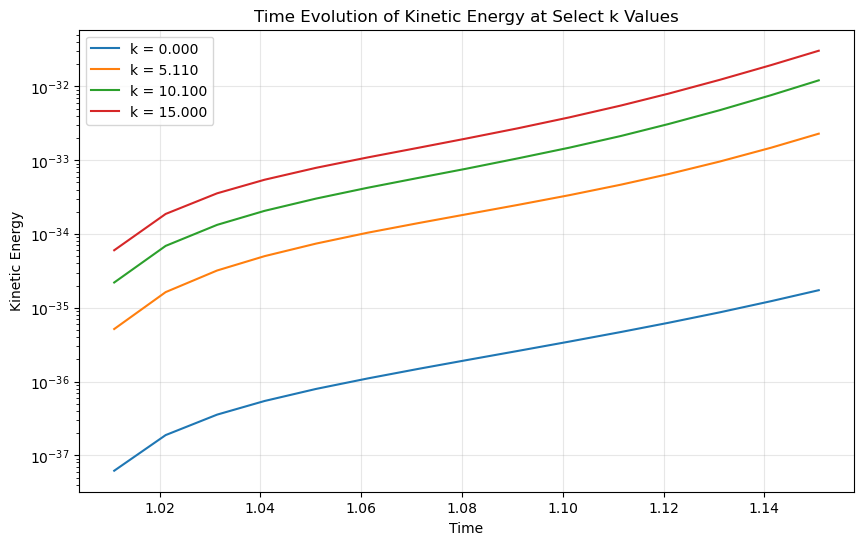

In [93]:
# Track the evolution of specific k modes
plt.figure(figsize=(10, 6))
k_indices = [0, 5, 10, 15] 

for k_idx in k_indices:
    plt.semilogy(pwns.t, pwns.kin[:, k_idx], '-', label=f'k = {pwns.krms[k_idx]:.3f}')
    
plt.xlabel('Time')
plt.ylabel('Kinetic Energy')
plt.title('Time Evolution of Kinetic Energy at Select k Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

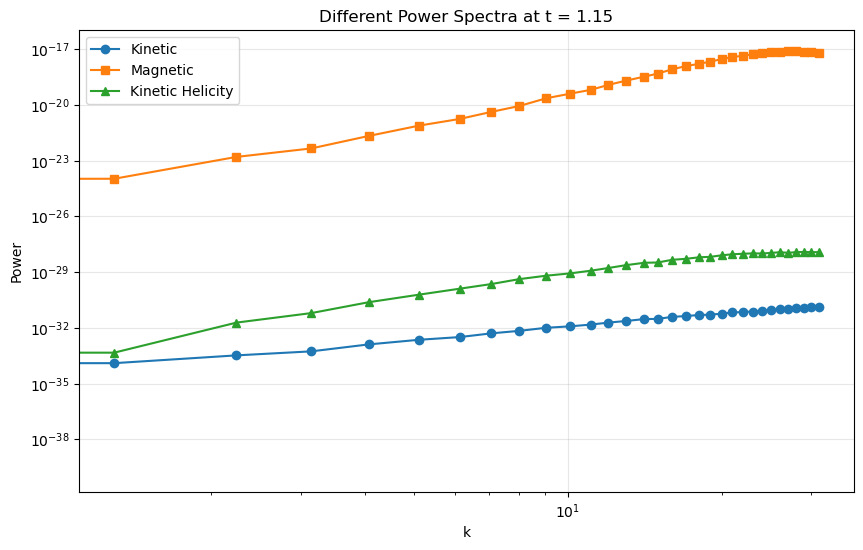

In [94]:
# Compare different types of spectra at the same time
plt.figure(figsize=(10, 6))

# Check if these spectra exist before plotting
if hasattr(pwns, 'kin'):
    plt.loglog(pwns.krms, pwns.kin[-1], 'o-', label='Kinetic')
if hasattr(pwns, 'mag'):
    plt.loglog(pwns.krms, pwns.mag[-1], 's-', label='Magnetic')
if hasattr(pwns, 'hel_kin'):
    plt.loglog(pwns.krms, np.abs(pwns.hel_kin[-1]), '^-', label='Kinetic Helicity')

plt.xlabel('k')
plt.ylabel('Power')
plt.title(f'Different Power Spectra at t = {pwns.t[-1]:.2f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

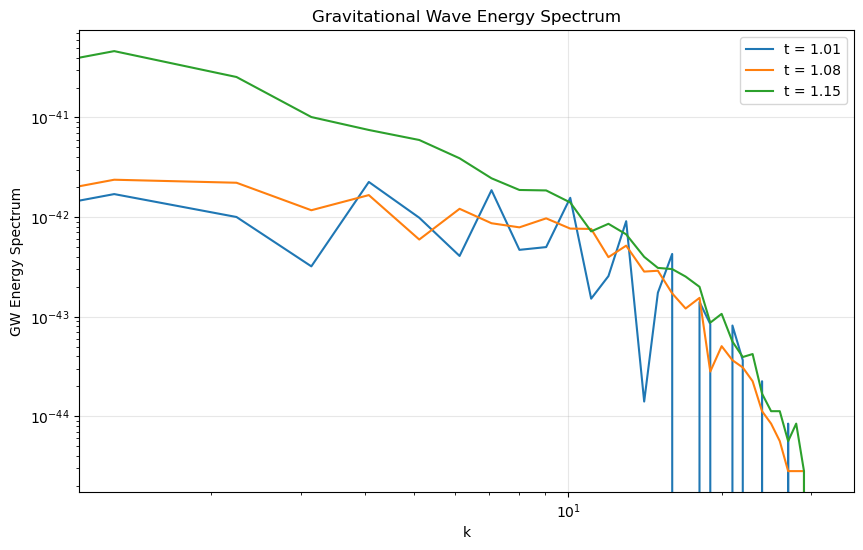

In [95]:
plt.figure(figsize=(10, 6))

# Plot the spectrum at different times
times = [0, len(pwns.t)//2, -1]  
for idx in times:
    plt.loglog(pwns.krms, pwns.GWs[idx],  label=f't = {pwns.t[idx]:.2f}')

plt.xlabel('k')
plt.ylabel('GW Energy Spectrum')
plt.title('Gravitational Wave Energy Spectrum')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Power for the simultations

In [104]:
pwns = pc.read.power(datadir=SIMns.datadir)
pwrd = pc.read.power(datadir=SIMrd.datadir)
pwrsd = pc.read.power(datadir=SIMsd.datadir)
pwrnd = pc.read.power(datadir=SIMnd.datadir)

powers_all = [pwns, pwrd, pwrsd, pwrnd]
powers_labels = ['no_source', 'ramp_decay', 'step_decay', 'step_no_decay']

power_GWh.dat
powerhel_GWs.dat
power_Tpq.dat
power_Str.dat
powerhel_kin.dat
power_GWs.dat
powerhel_mag.dat
power_sp.dat
power_krms.dat
power_SCL.dat
power_mag.dat
powerhel_Str.dat
power_VCT.dat
power_kin.dat
powerhel_GWh.dat
power_GWh.dat
powerhel_GWs.dat
power_Tpq.dat
power_Str.dat
powerhel_kin.dat
power_GWs.dat
powerhel_mag.dat
power_sp.dat
power_krms.dat
power_SCL.dat
power_mag.dat
powerhel_Str.dat
power_VCT.dat
power_kin.dat
powerhel_GWh.dat
power_GWh.dat
powerhel_GWs.dat
power_Tpq.dat
power_Str.dat
powerhel_kin.dat
power_GWs.dat
powerhel_mag.dat
power_sp.dat
power_krms.dat
power_SCL.dat
power_mag.dat
powerhel_Str.dat
power_VCT.dat
power_kin.dat
powerhel_GWh.dat
power_GWh.dat
powerhel_GWs.dat
power_Tpq.dat
power_Str.dat
powerhel_kin.dat
power_GWs.dat
powerhel_mag.dat
power_sp.dat
power_krms.dat
power_SCL.dat
power_mag.dat
powerhel_Str.dat
power_VCT.dat
power_kin.dat
powerhel_GWh.dat


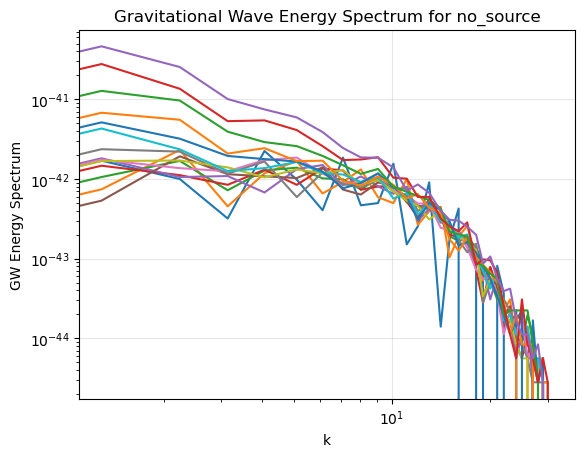

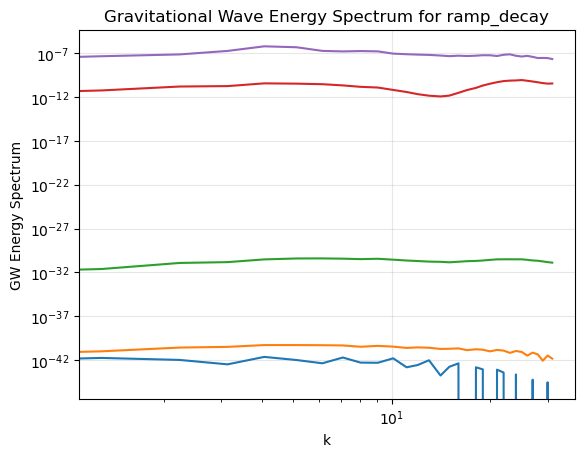

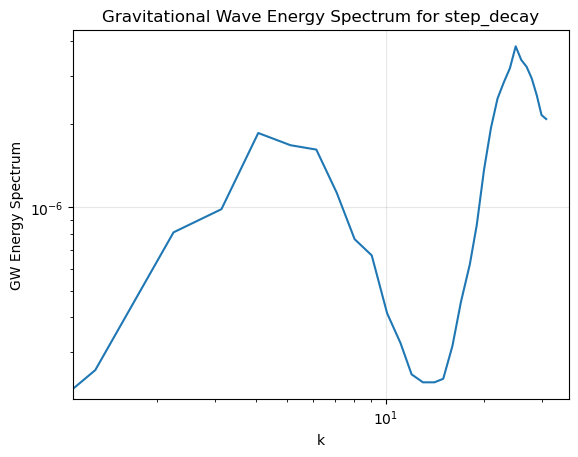

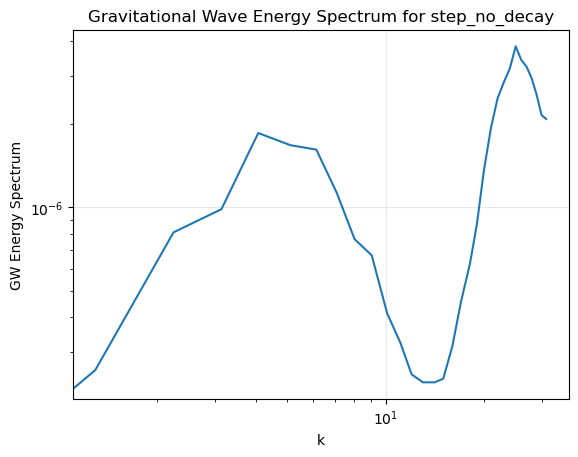

In [110]:
for id,sim in enumerate(powers_all):
    times = [i for i in range(0, len(sim.t))] 
    for idx in times:
        plt.loglog(sim.krms, sim.GWs[idx], label=f't = {sim.t[idx]:.2f}')
    plt.xlabel('k')
    plt.ylabel('GW Energy Spectrum')
    plt.title(f'Gravitational Wave Energy Spectrum for {powers_labels[id]}')
    #plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


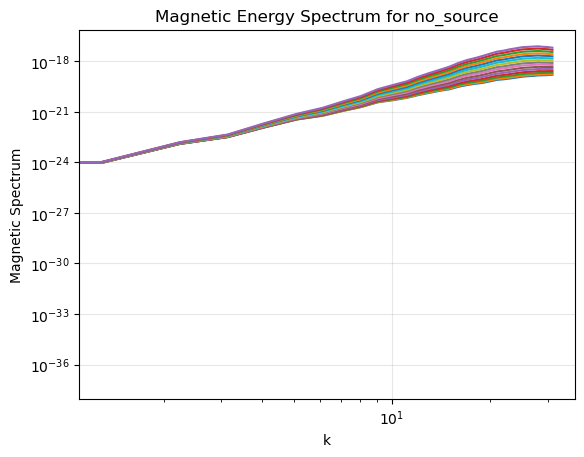

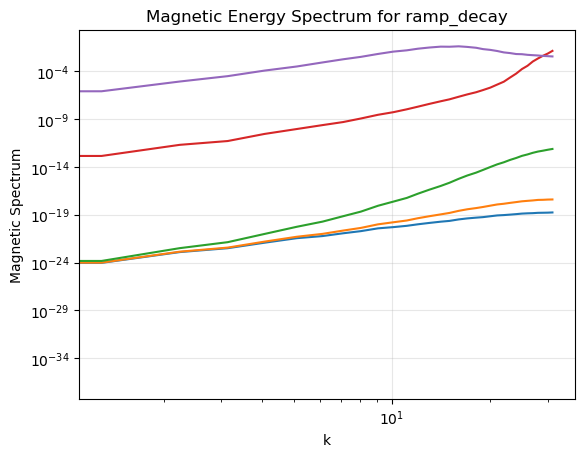

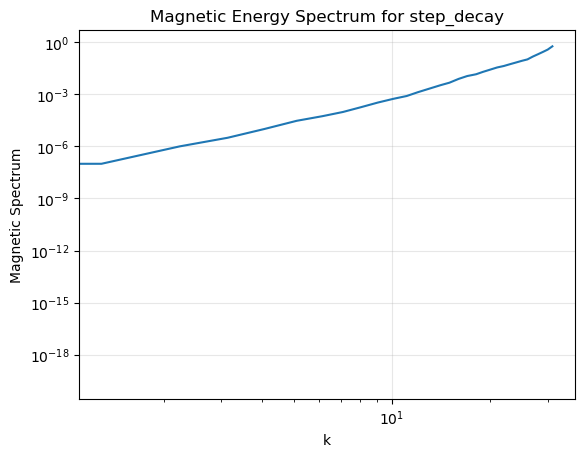

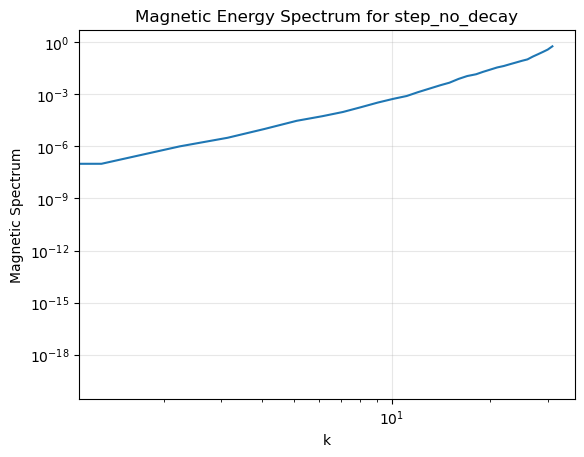

In [109]:
for id,sim in enumerate(powers_all):
    times = [i for i in range(0, len(sim.t))] 
    for idx in times:
        plt.loglog(sim.krms, sim.mag[idx], label=f't = {sim.t[idx]:.2f}')
    plt.xlabel('k')
    plt.ylabel('Magnetic Spectrum')
    plt.title(f'Magnetic Energy Spectrum for {powers_labels[id]}')
    #plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()